In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import warnings
import seaborn as sns
import networkx as nx
import matplotlib.colors as mcolors
from scipy import stats
# pd.options.display.max_rows = None
# pd.options.display.max_columns = None
import glob as glob
import math
pd.set_option('display.max_rows', None)  # To display all rows
pd.set_option('display.max_columns', None)  # To display all columns
from scipy.stats import shapiro

In [3]:
gm_2q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_2quant.csv')
gm_3q = pd.read_csv('graph_metrics_adni_a4_bootstrapped_3quant.csv')

In [4]:
print(gm_3q['Centiloid Quantile'].unique())
print(gm_2q['Centiloid Quantile'].unique())

[0 1 2]
[0 1 2]


In [5]:
print(gm_3q.head())

  Dataset  Centiloid Quantile  Weighted Clustering Coefficient  \
0    ADNI                   0                         0.081535   
1    ADNI                   0                         0.073002   
2    ADNI                   0                         0.079084   
3    ADNI                   0                         0.074084   
4    ADNI                   0                         0.072080   

   Weighted Avg. Shortest Path Length  Weighted Small World  
0                            2.335027              0.321469  
1                            2.219996              0.336764  
2                            2.244031              0.360254  
3                            2.350956              0.294698  
4                            2.321454              0.287563  


I. subdivide adni and a4 from gm3q df 


In [6]:
adni_gm = gm_3q[gm_3q['Dataset']=='ADNI']
a4_gm = gm_3q[gm_3q['Dataset']=='A4']

In [7]:
print(adni_gm['Dataset'].nunique()) #looks good
print(a4_gm['Dataset'].nunique())

1
1


II. Visualize the distributions of the graph metrics to know what statistical tests are apprporiate 
* Weighted clustering coefficient 
* Weighted average path length
* Weighted small world coefficient 

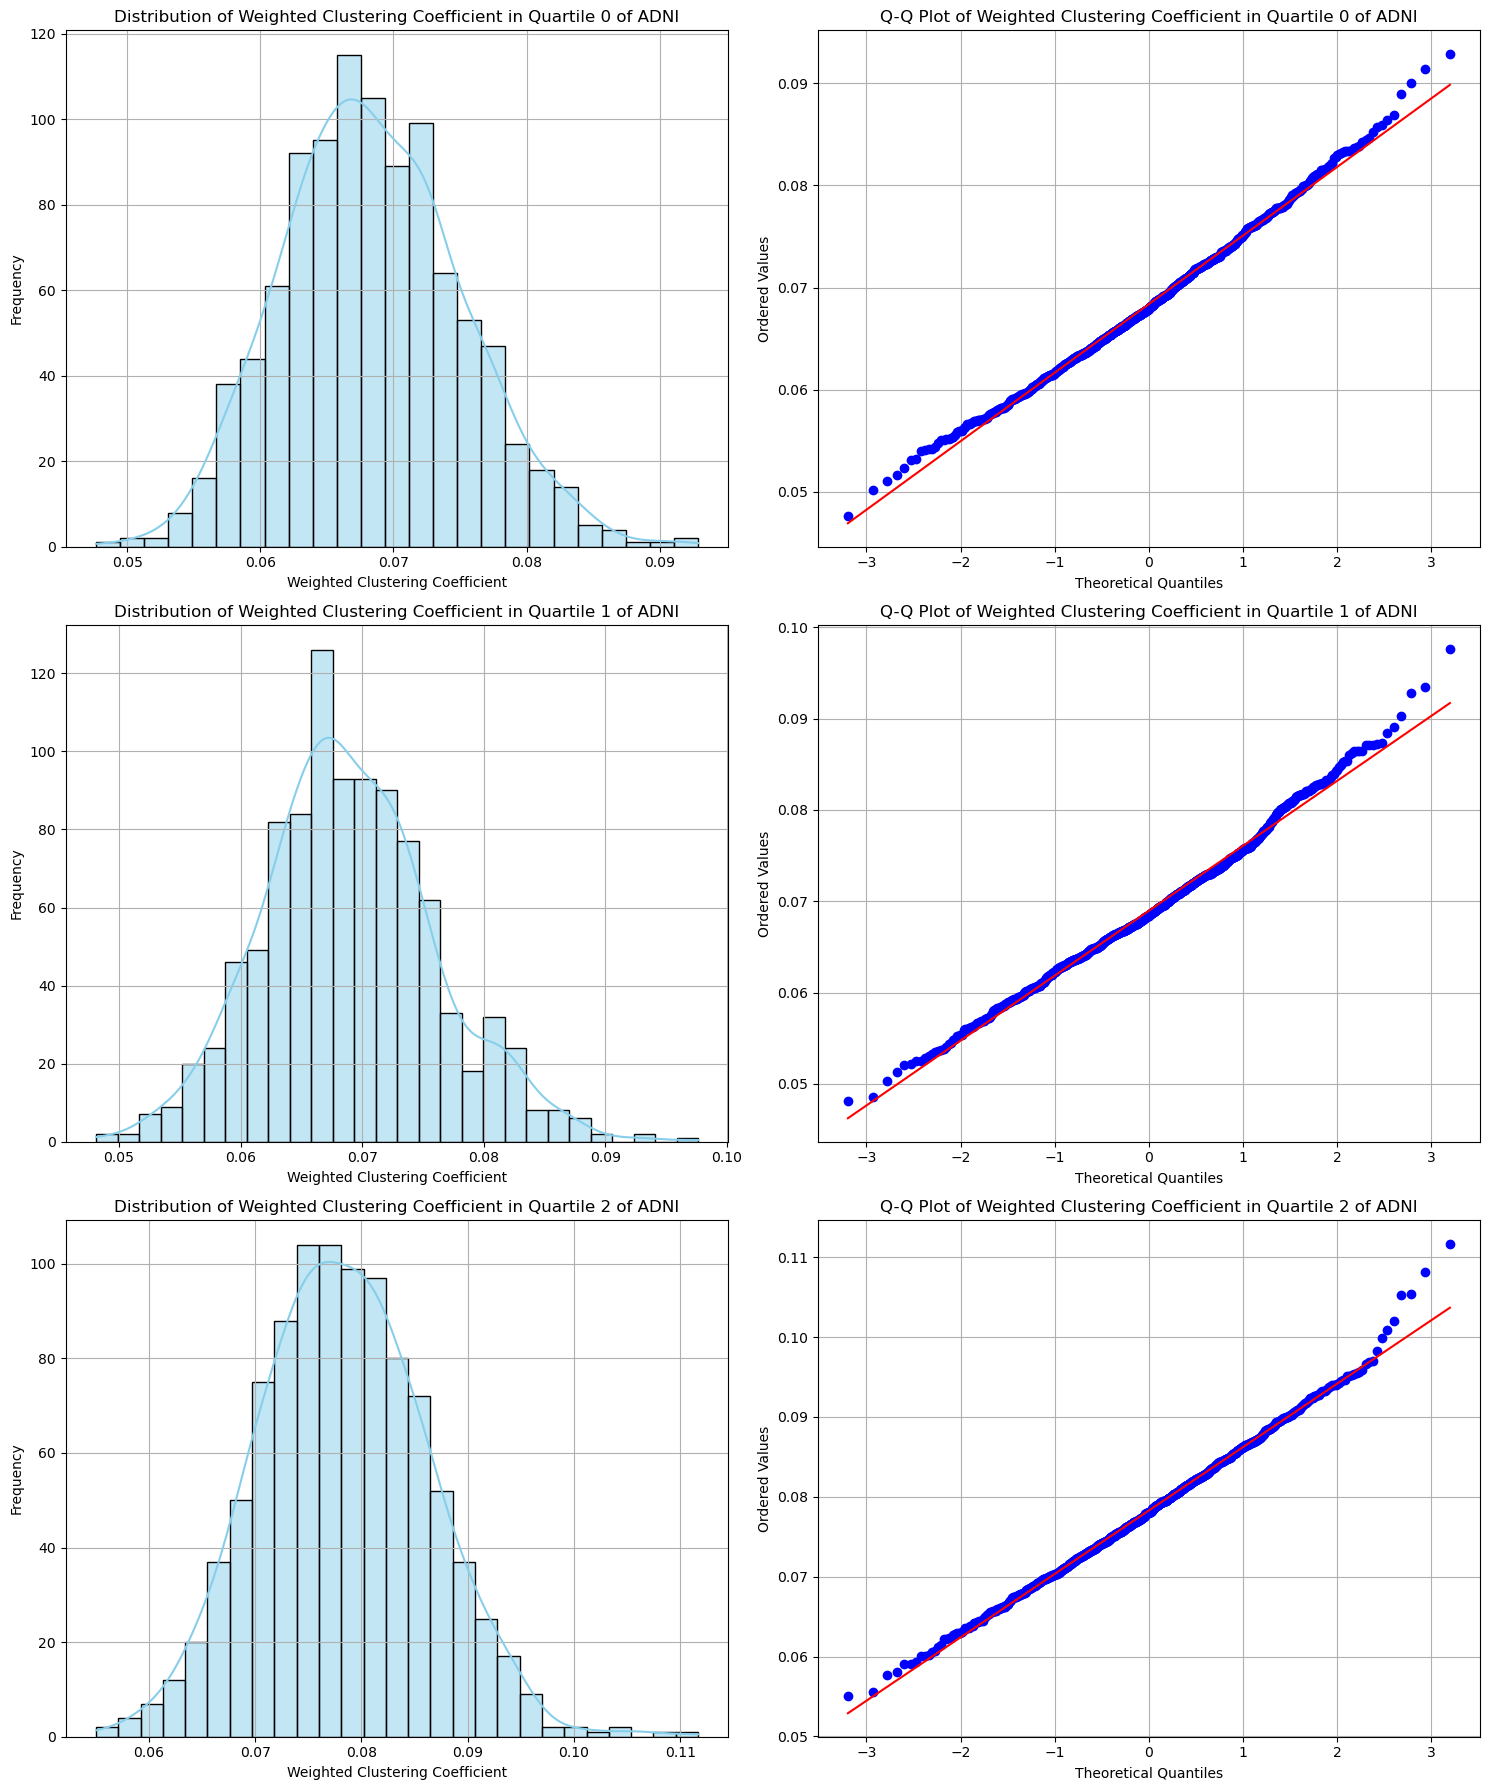

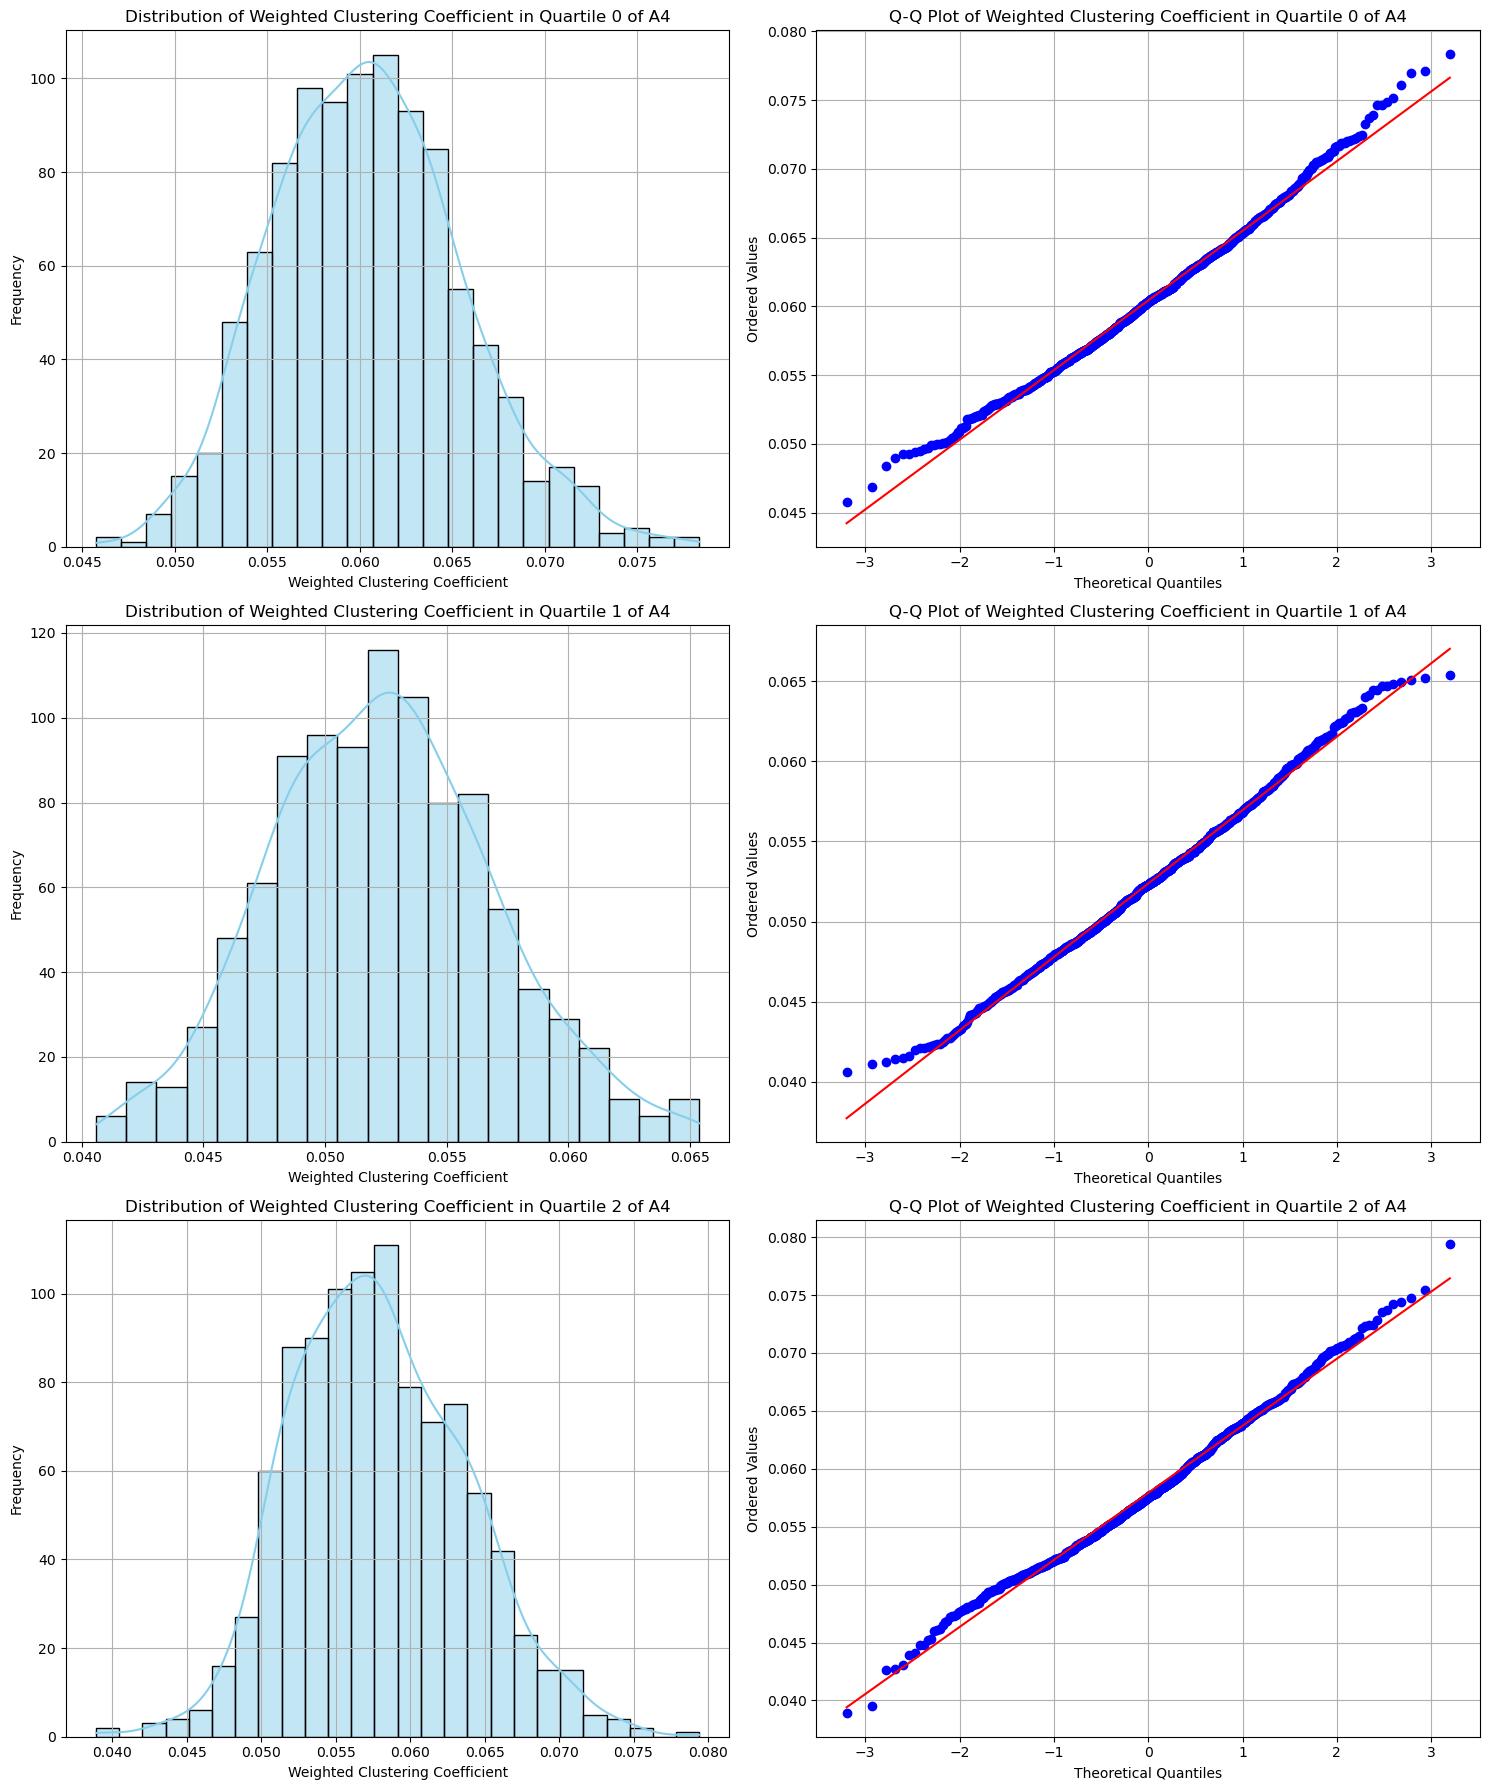

In [13]:
#single plot for adni and a4

def plot_weighted_clustering_coefficient_combined(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]
    
    # Grouping DataFrame by 'Centiloid Quantile'
    quartile_groups = df.groupby('Centiloid Quantile')
    n_quartiles = len(quartile_groups)
    
    # Create a figure with a subplot for each quartile, arranged in rows
    fig, axes = plt.subplots(n_quartiles, 2, figsize=(15, 6 * n_quartiles))
    
    # If there's only one quartile, axes are not an array of arrays
    if n_quartiles == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration if we have more than one quartile
    axes = axes.flatten() if n_quartiles > 1 else axes
    
    # Iterate through each quartile group and its corresponding axes
    for (quartile, group_df), ax_pair in zip(quartile_groups, zip(axes[::2], axes[1::2])):
        ax1, ax2 = ax_pair  # Unpack the pair of axes
        
        # Histogram Plot
        sns.histplot(group_df['Weighted Clustering Coefficient'], kde=True, color='skyblue', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Clustering Coefficient in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Clustering Coefficient')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Clustering Coefficient'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Clustering Coefficient in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
    # Adjusting layout for the entire figure
    plt.tight_layout()
    plt.show()

# Assuming 'adni_gm' and 'a4_gm' are your DataFrames
plot_weighted_clustering_coefficient_combined(adni_gm)
plot_weighted_clustering_coefficient_combined(a4_gm)


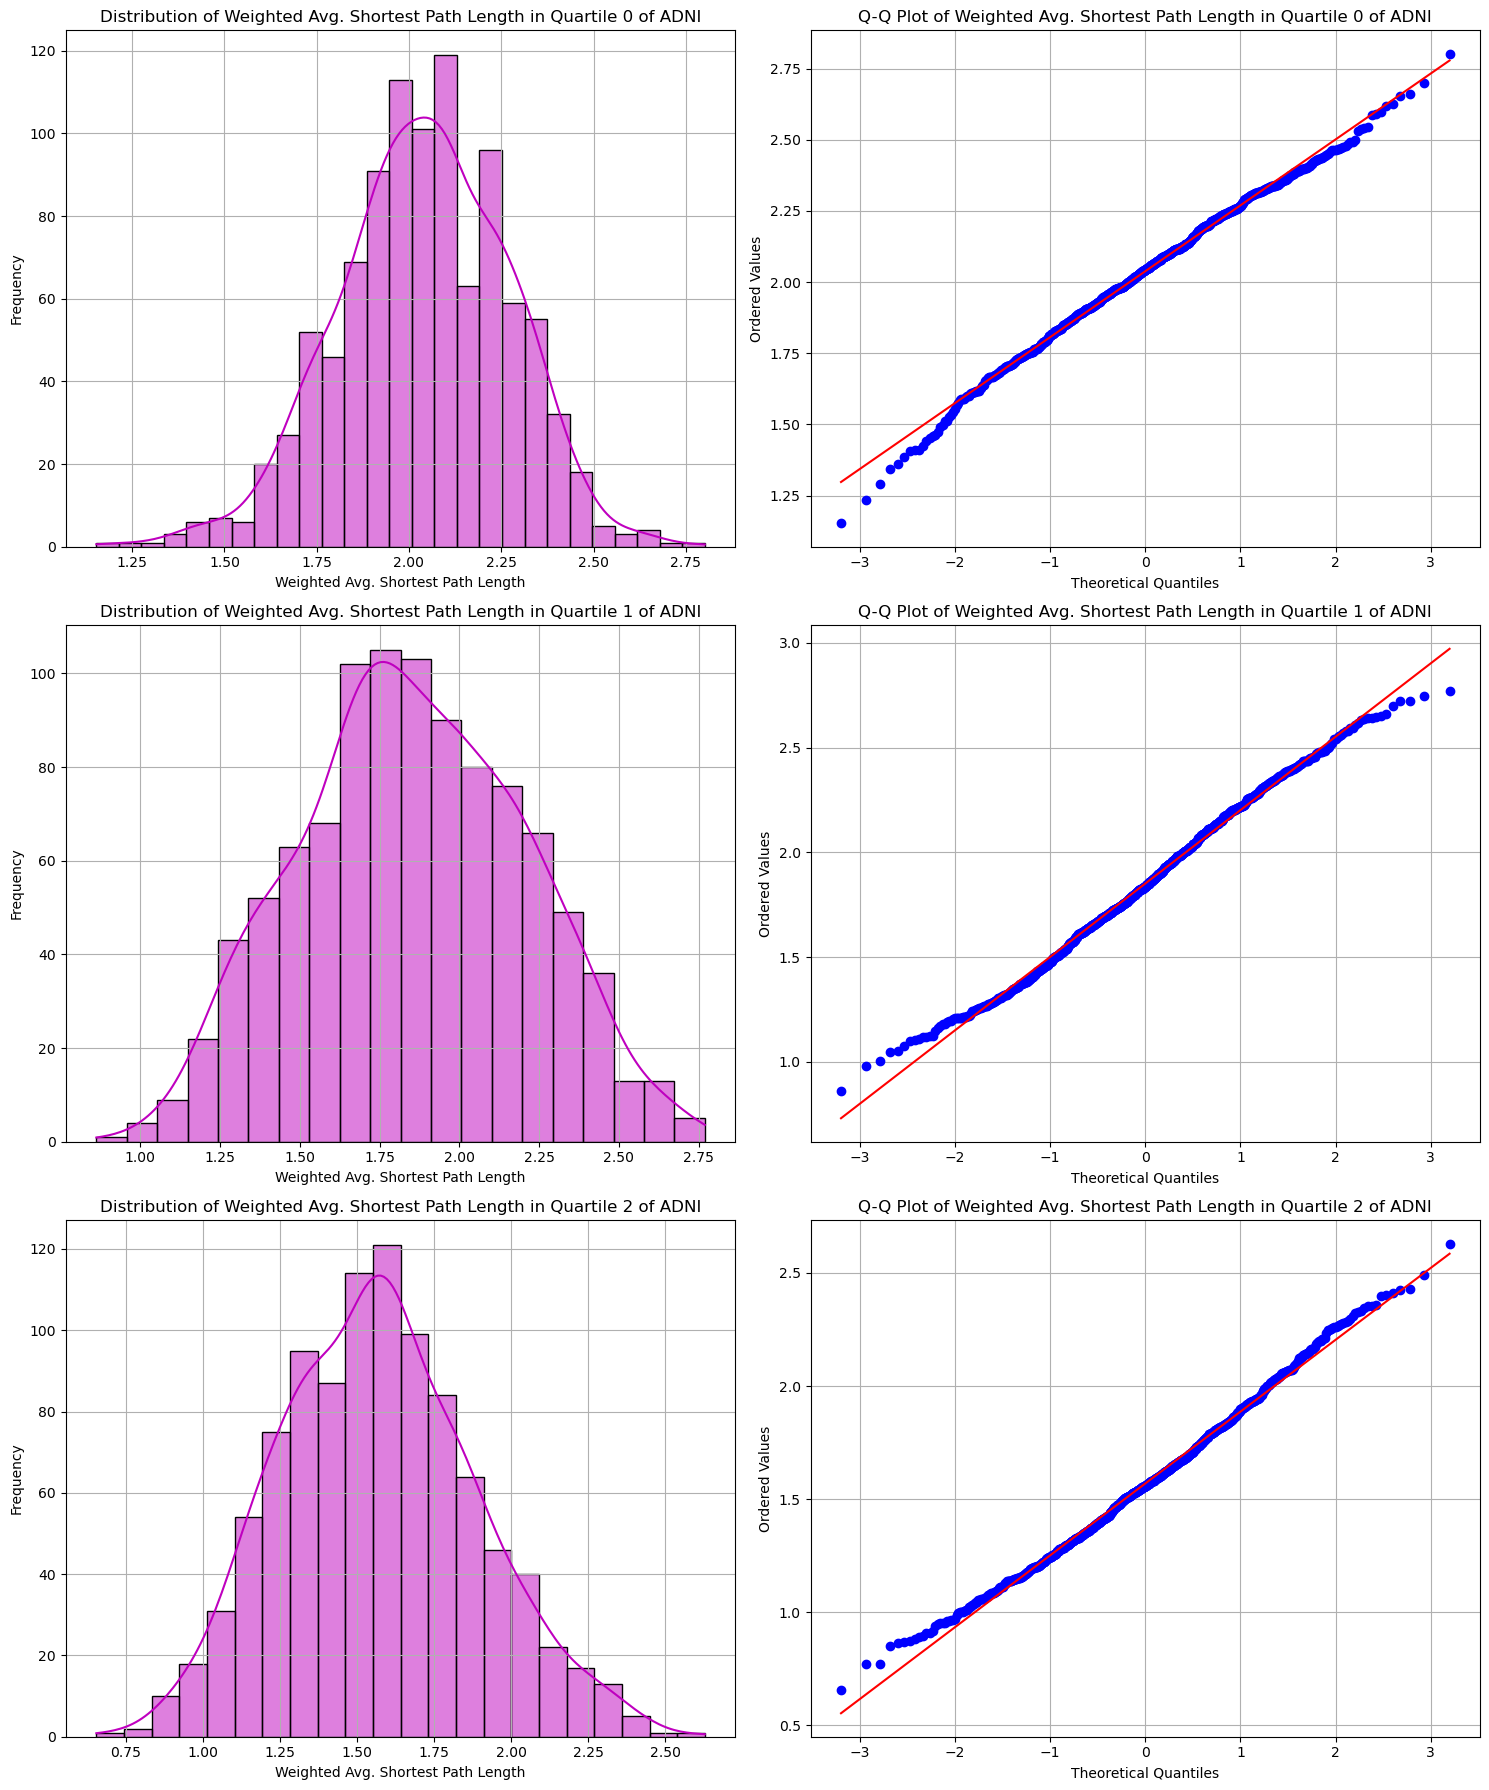

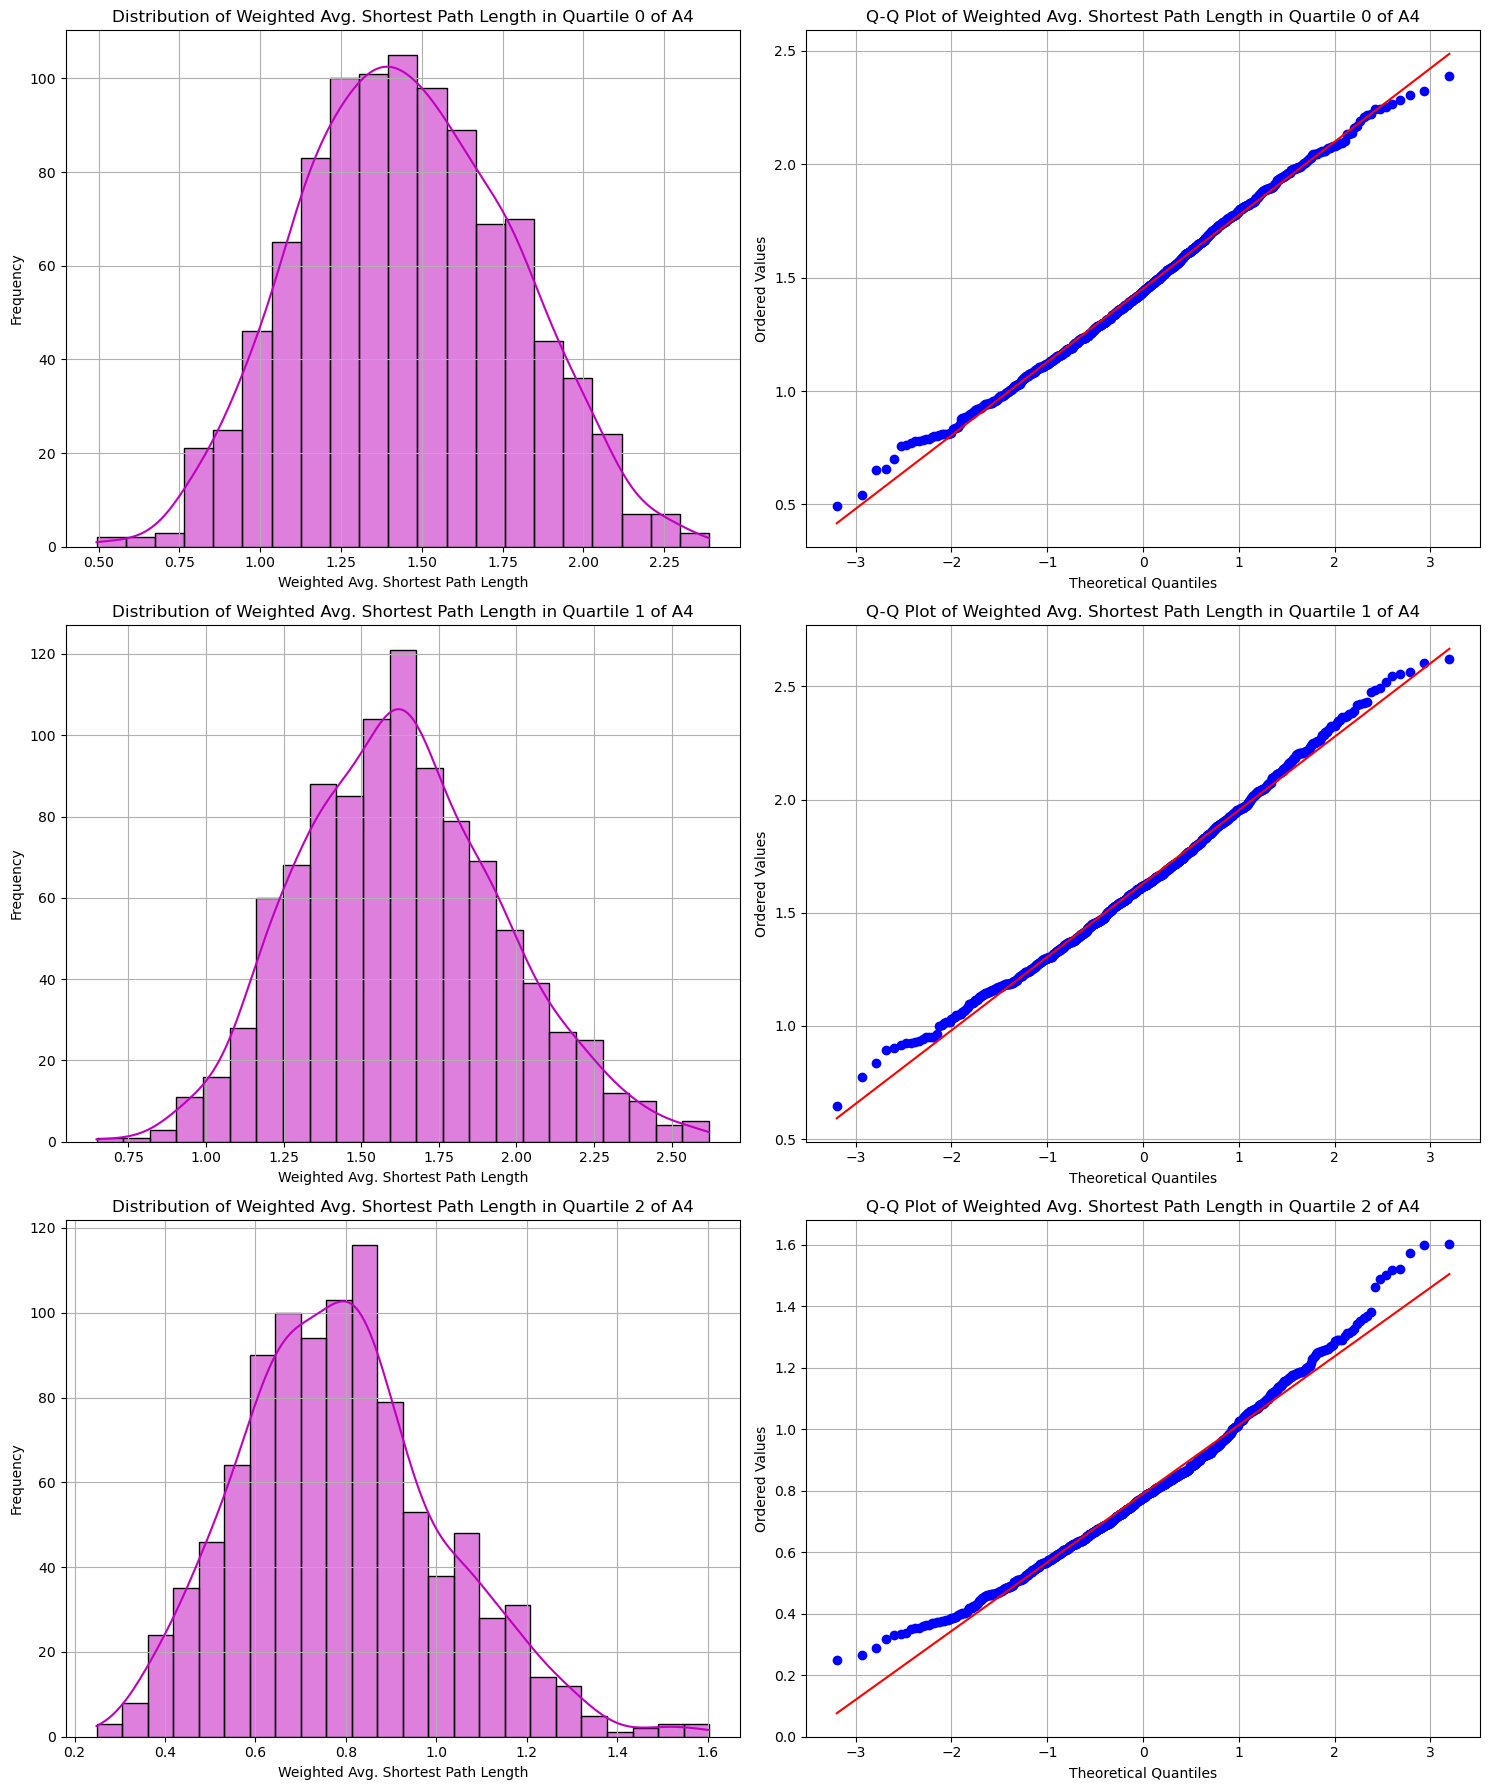

In [12]:
#just 2 plots 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def plot_aspl_combined(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]
    
    # Grouping DataFrame by 'Centiloid Quantile'
    quartile_groups = df.groupby('Centiloid Quantile')
    n_quartiles = len(quartile_groups)
    
    # Create a figure with a subplot for each quartile, arranged in rows
    fig, axes = plt.subplots(n_quartiles, 2, figsize=(15, 6 * n_quartiles))
    
    # If there's only one quartile, axes are not an array
    if n_quartiles == 1:
        axes = [axes]

    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate through each quartile group and its corresponding axes
    for (quartile, group_df), (ax1, ax2) in zip(quartile_groups, zip(axes[::2], axes[1::2])):
        # Histogram Plot
        sns.histplot(group_df['Weighted Avg. Shortest Path Length'], kde=True, color='m', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Avg. Shortest Path Length in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Avg. Shortest Path Length')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Avg. Shortest Path Length'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Avg. Shortest Path Length in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
    # Adjusting layout for the entire figure
    plt.tight_layout()
    plt.show()

# Assuming 'adni_gm' and 'a4_gm' are your DataFrames
plot_aspl_combined(adni_gm)
plot_aspl_combined(a4_gm)


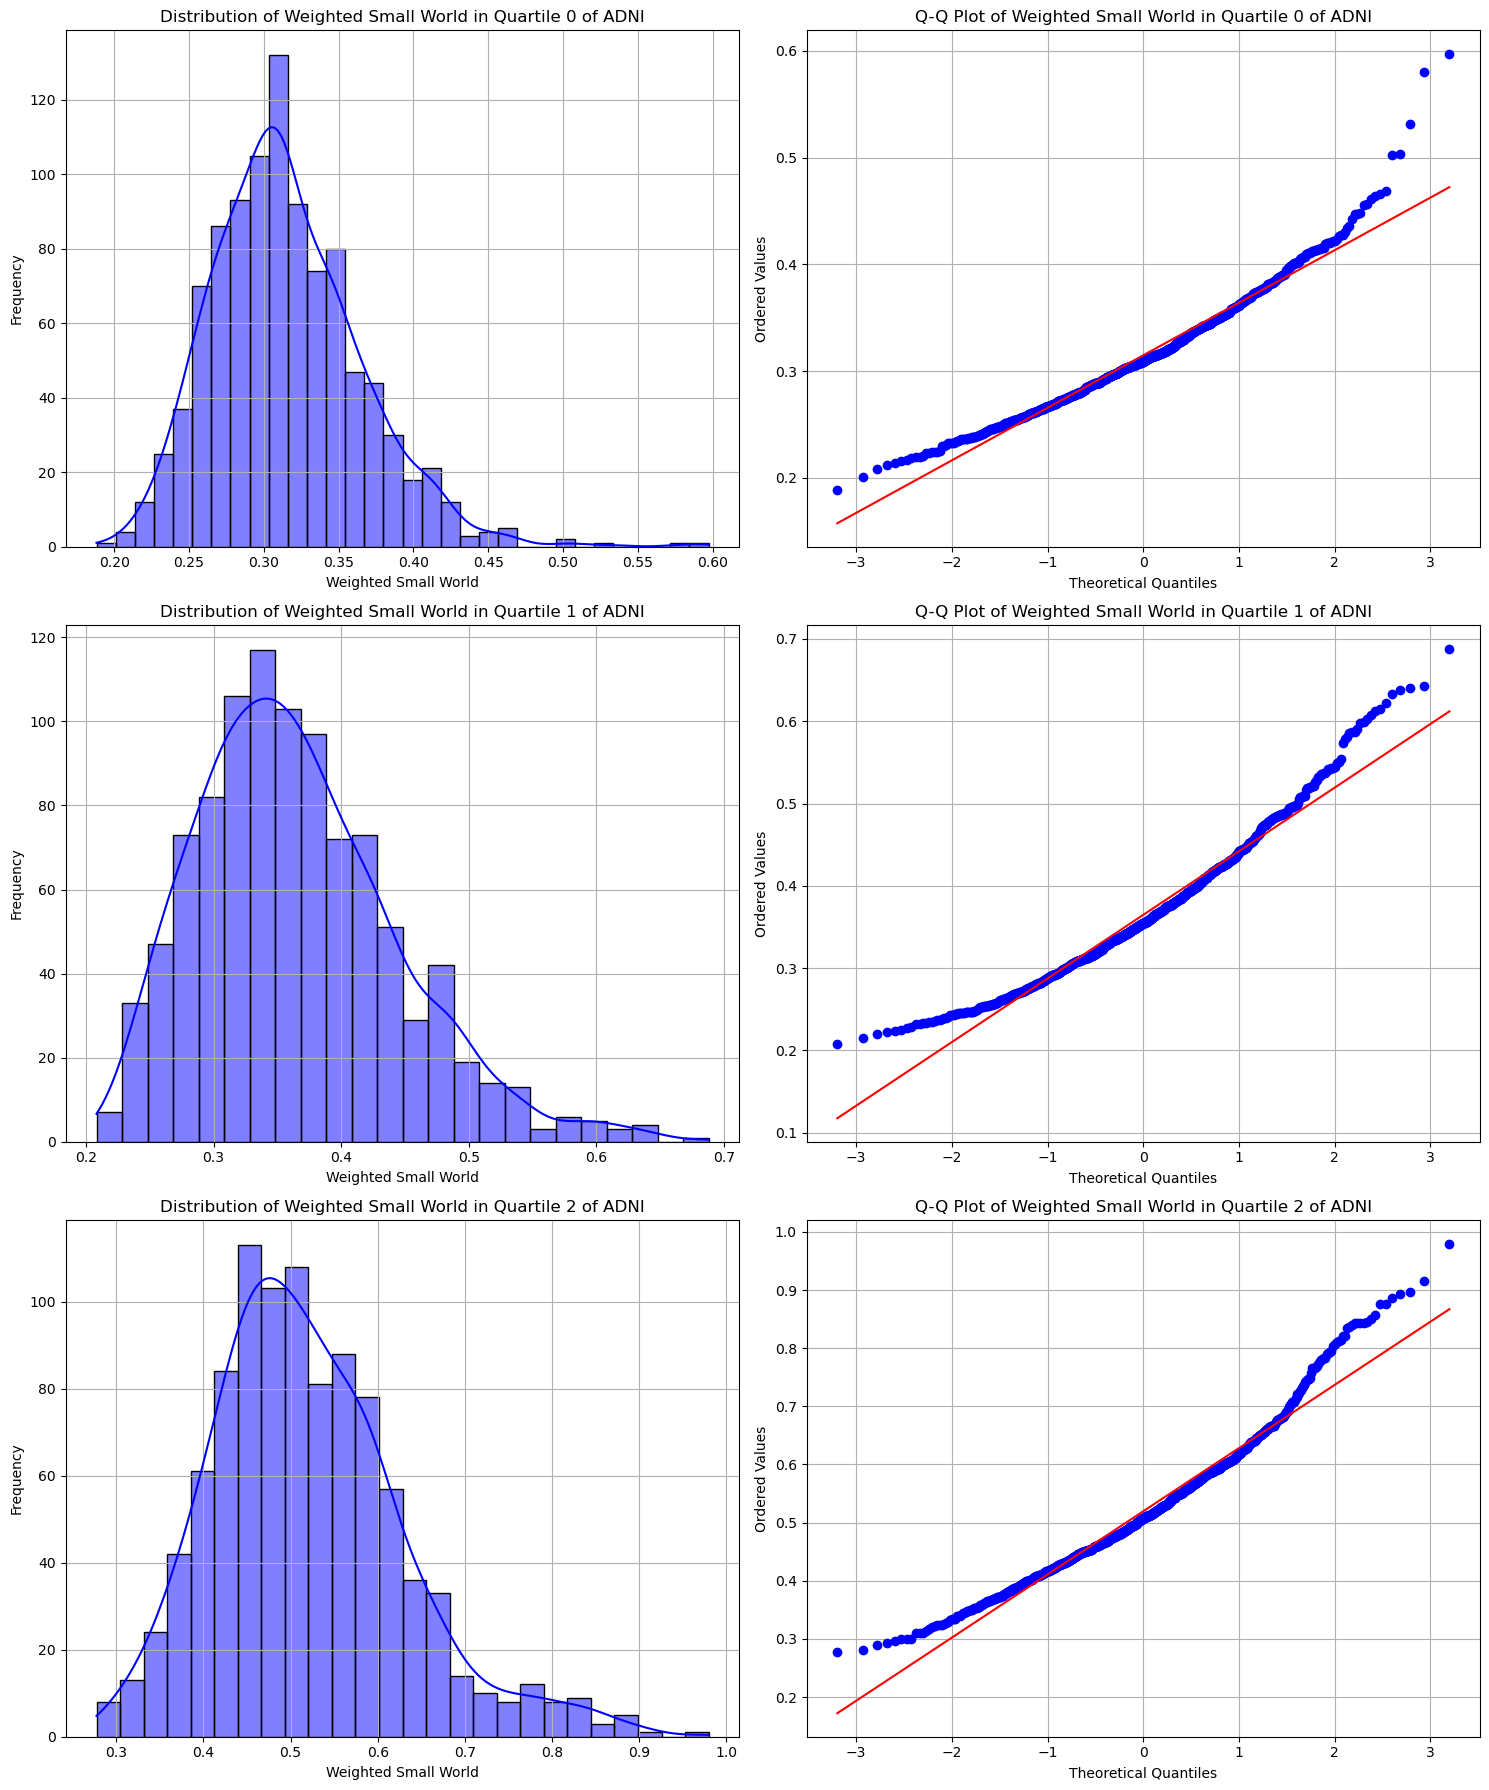

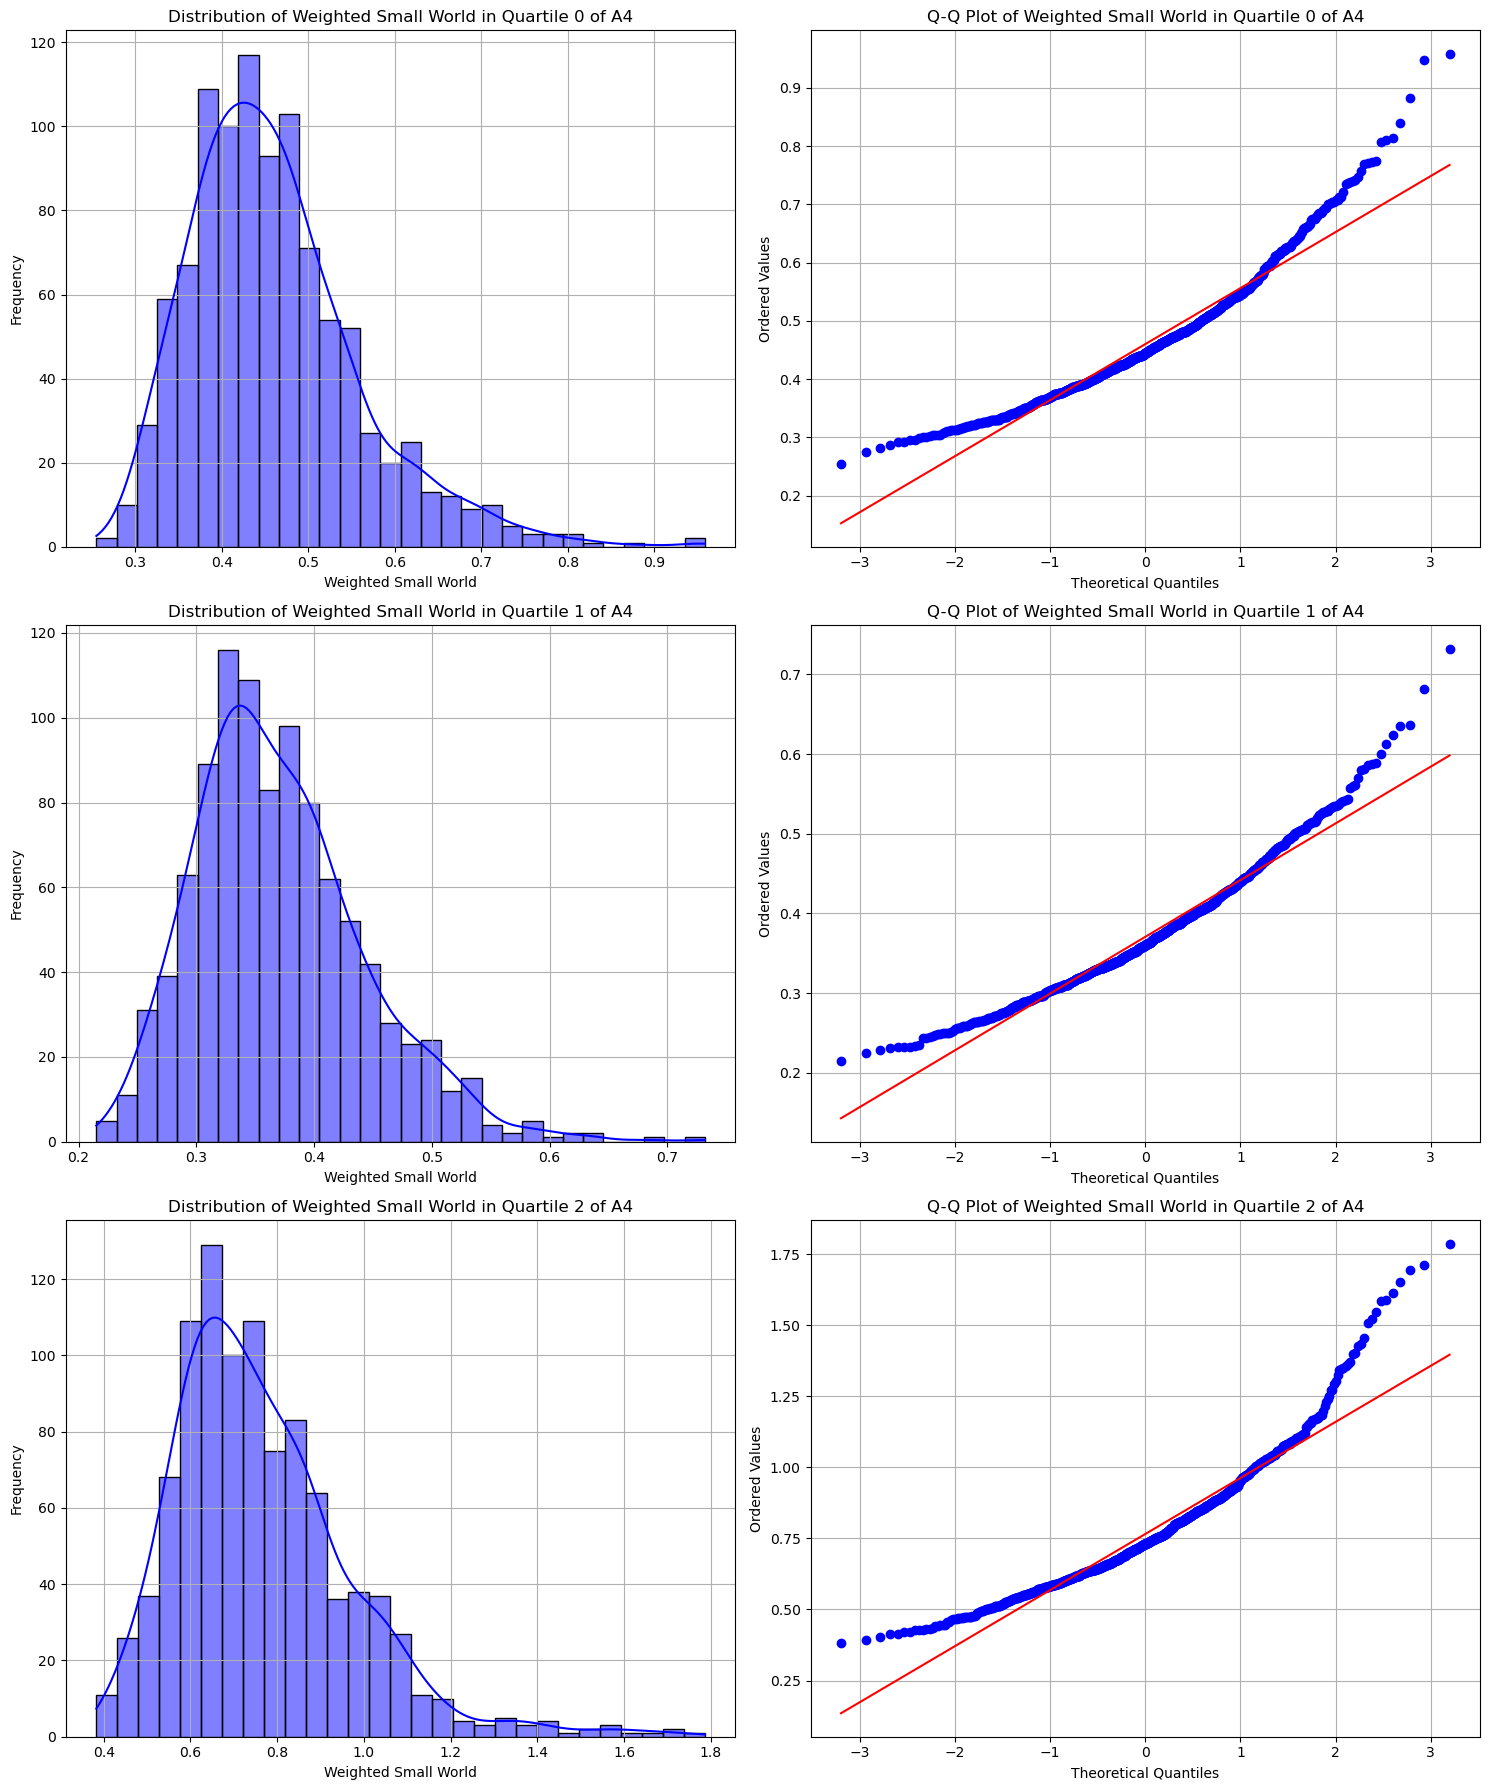

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

def wsw_hist_combined(df):
    # Extracting the dataset name from the 'Dataset' column of the first row
    dataset_name = df['Dataset'].iloc[0]  
    
    # Grouping DataFrame by 'Centiloid Quantile'
    quartile_groups = df.groupby('Centiloid Quantile')
    n_quartiles = len(quartile_groups)
    
    # Create a figure with a subplot for each quartile, arranged in rows
    fig, axes = plt.subplots(n_quartiles, 2, figsize=(15, 6 * n_quartiles))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate through each quartile group and its corresponding axes
    for (quartile, group_df), (ax1, ax2) in zip(quartile_groups, zip(axes[::2], axes[1::2])):
        # Histogram Plot
        sns.histplot(group_df['Weighted Small World'], kde=True, color='blue', ax=ax1)
        ax1.set_title(f'Distribution of Weighted Small World in Quartile {quartile} of {dataset_name}')
        ax1.set_xlabel('Weighted Small World')
        ax1.set_ylabel('Frequency')
        ax1.grid(True)
        
        # Q-Q Plot
        stats.probplot(group_df['Weighted Small World'], dist="norm", plot=ax2)
        ax2.set_title(f'Q-Q Plot of Weighted Small World in Quartile {quartile} of {dataset_name}')
        ax2.set_xlabel('Theoretical Quantiles')
        ax2.set_ylabel('Ordered Values')
        ax2.grid(True)
        
    # Adjusting layout for the entire figure
    plt.tight_layout()
    plt.show()

# Assuming 'adni_gm' and 'a4_gm' are your DataFrames
wsw_hist_combined(adni_gm)
wsw_hist_combined(a4_gm)
